DIGITAL ASSIGNMENT - 1 & 2
Prepared by:
KRISHNANSH SINGH - 19BLC1143
SAJAL TAYAL - 19BLC1165


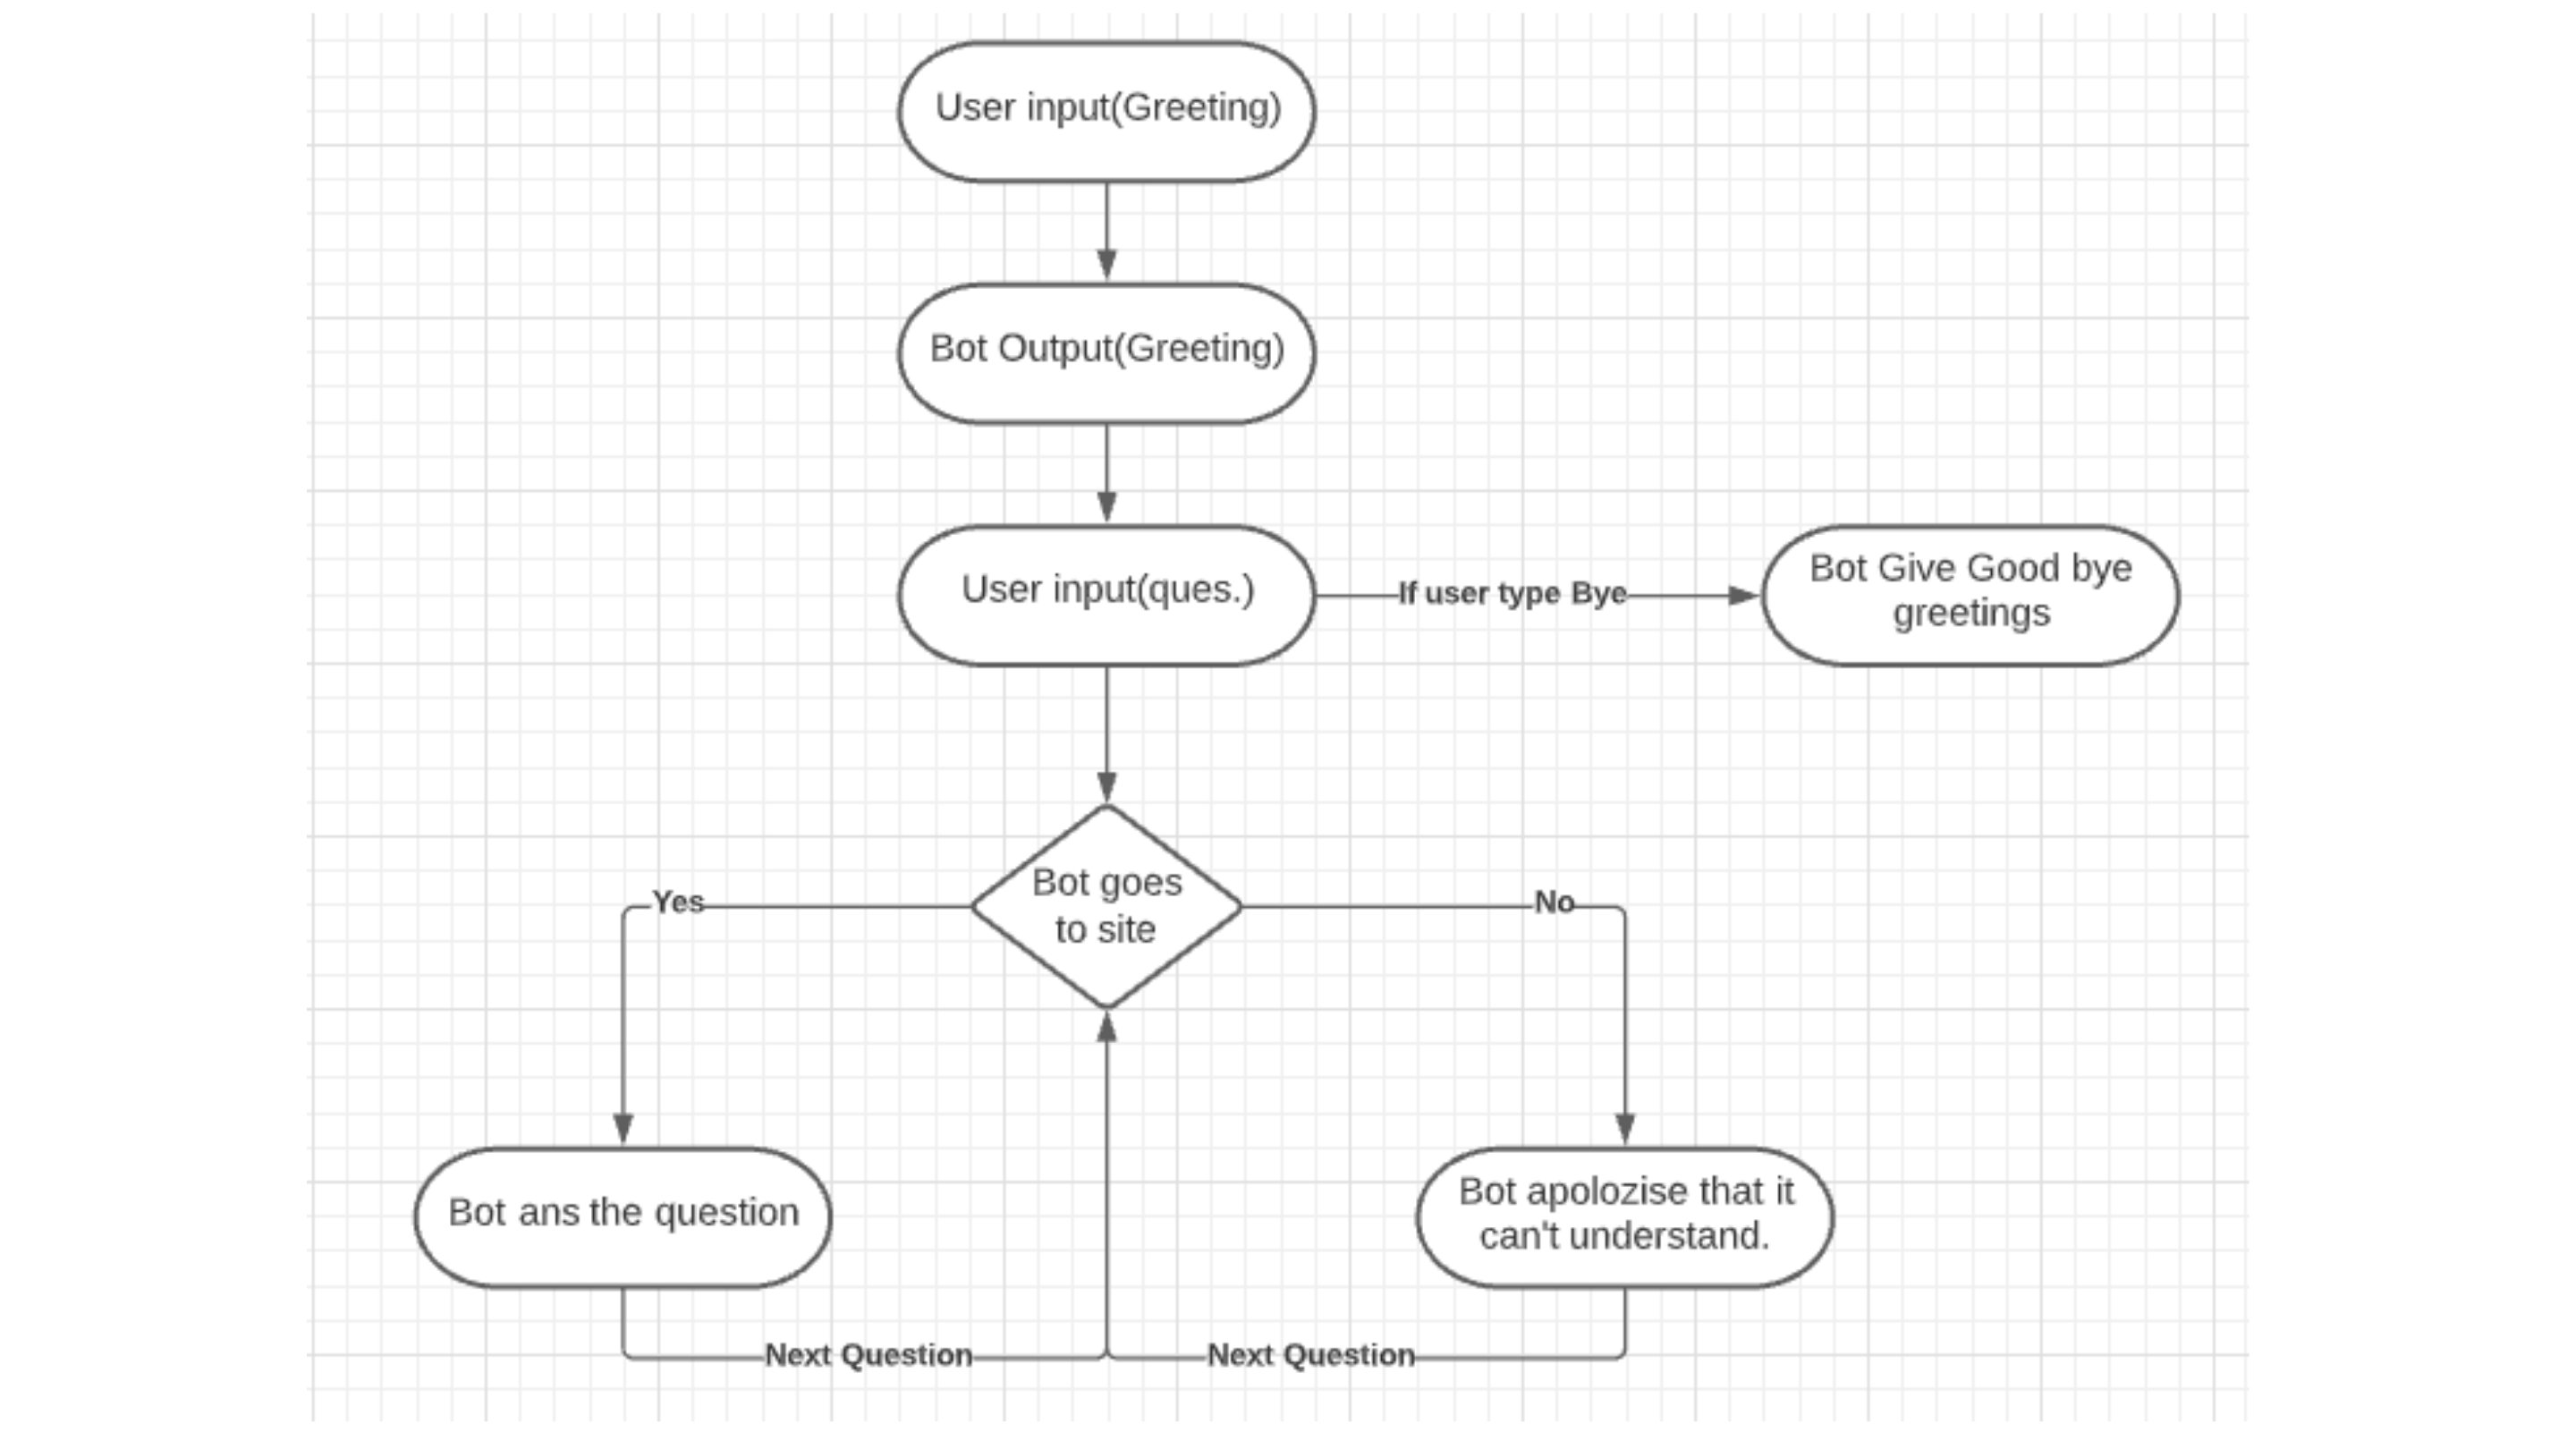

In [1]:
pip install nltk

In [2]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 11.6 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 7.4 MB 55.5 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=ff146cfc1182cd86b88e56e56c0be77237e9696269c47fda970fbde62478b8a4
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=aa76138a180cd7ba7eadb916f59a971eb661d71f44ae505bbce546543d425398
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=9d2fdf4aa7159cca56f6913f4cb60dbf8a4ec27b04496fcd87913a150a6e04ed
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979574

In [22]:
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
nltk.download('punkt', quiet=True)
 
#Get The Article
article = Article('https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521')
article.download()
article.parse()
article.nlp()
corpus = article.text
 
 
#Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text) #Create list of sentences

#Print List Of Sentences
print(sentence_list)
 
#Random Greeting Response Function
def greeting_response(text):
    text = text.lower()
 
    #Bots greeting response
    bot_greetings = ['Howdy!', 'Hi!', 'Hello!', 'Greetings!']
 
    #User greeting
    user_greetings = ['hi', 'hey', 'hello', 'greetings', 'wassup']
 
    for word in text.split():
        if word in user_greetings:
            return random.choice(bot_greetings)
 
 
def index_sort(list_var):
    lenght = len(list_var)
    list_index = list(range(0, lenght))
 
    x = list_var
    for i in range(lenght):
        for j in range(lenght):
            if x[list_index[i]] > x[list_index[j]]:
                #Swap
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
 
    return list_index
 
#Bots Response
def bot_response(user_input):
    user_input = user_input.lower()
    sentence_list.append(user_input)
    bot_response = ''
    cm = CountVectorizer().fit_transform(sentence_list)
    similarity_scores = cosine_similarity(cm[-1], cm)
    similarity_scores_list = similarity_scores.flatten()
    index = index_sort(similarity_scores_list)
    index = index[1:]
    response_flag = 0
 
    j = 0
    for i in range(len(index)):
        if similarity_scores_list[index[i]] > 0.0:
            bot_response = bot_response+' '+sentence_list[index[i]]
            response_flag = 1
            j = j+1
        if j > 2:
            break
 
        if response_flag == 0:
            bot_response = bot_response+' '+"I apologize, I don't understand."
        sentence_list.remove(user_input)
 
        return bot_response
 
#Start the chat
print('Welcome to a BASIC level chatbot which will try to resolve all your queries regarding CHRONIC KIDNEY DISEASE!!..')
print('Doc Bot: Hi I am a Doctor Bot.') 
 
exit_list = ['exit', 'see you later', 'bye', 'quit', 'break', 'stop']
 
 
while(True):
    user_input = input()
    if user_input.lower() in exit_list:
        print('Doc Bot: Chat with you later, and remember... stay safe!')
        break
    else:
        if greeting_response(user_input) != None:
            print('Doc Bot: '+greeting_response(user_input))
        else:
            print('Doc Bot: '+bot_response(user_input))
 

['Overview\n\nChronic kidney disease, also called chronic kidney failure, involves a gradual loss of kidney function.', 'Your kidneys filter wastes and excess fluids from your blood, which are then removed in your urine.', 'Advanced chronic kidney disease can cause dangerous levels of fluid, electrolytes and wastes to build up in your body.', 'In the early stages of chronic kidney disease, you might have few signs or symptoms.', 'You might not realize that you have kidney disease until the condition is advanced.', 'Treatment for chronic kidney disease focuses on slowing the progression of kidney damage, usually by controlling the cause.', 'But, even controlling the cause might not keep kidney damage from progressing.', 'Chronic kidney disease can progress to end-stage kidney failure, which is fatal without artificial filtering (dialysis) or a kidney transplant.', 'How kidneys work Show transcript for video How kidneys work One of the important jobs of the kidneys is to clean the blood.